In [1]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import cifar10
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

### CIFAR-10 dataset

- RGB images (3 channels)
- 32x32 pixels
- 10 classes
- Training set: 50,000 images
- Testing set: 10,000 images


In [2]:
%%capture
# Download the dataset - CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [3]:
# Data information
print(f"Training data shape: {x_train.shape}, {x_train.dtype}")
print(f"Training labels shape: {y_train.shape}, {y_train.dtype}")
print(f"Testing data shape: {x_test.shape}, {x_test.dtype}")
print(f"Testing labels shape: {y_test.shape}, {y_test.dtype}")

Training data shape: (50000, 32, 32, 3), uint8
Training labels shape: (50000, 1), uint8
Testing data shape: (10000, 32, 32, 3), uint8
Testing labels shape: (10000, 1), uint8


In [4]:
# Range of values
print(f"Training data range: {x_train.min()} to {x_train.max()}")
print(f"Testing data range: {x_test.min()} to {x_test.max()}")
# Labels
print(f"Class labels: {np.unique(y_train)}")


Training data range: 0 to 255
Testing data range: 0 to 255
Class labels: [0 1 2 3 4 5 6 7 8 9]


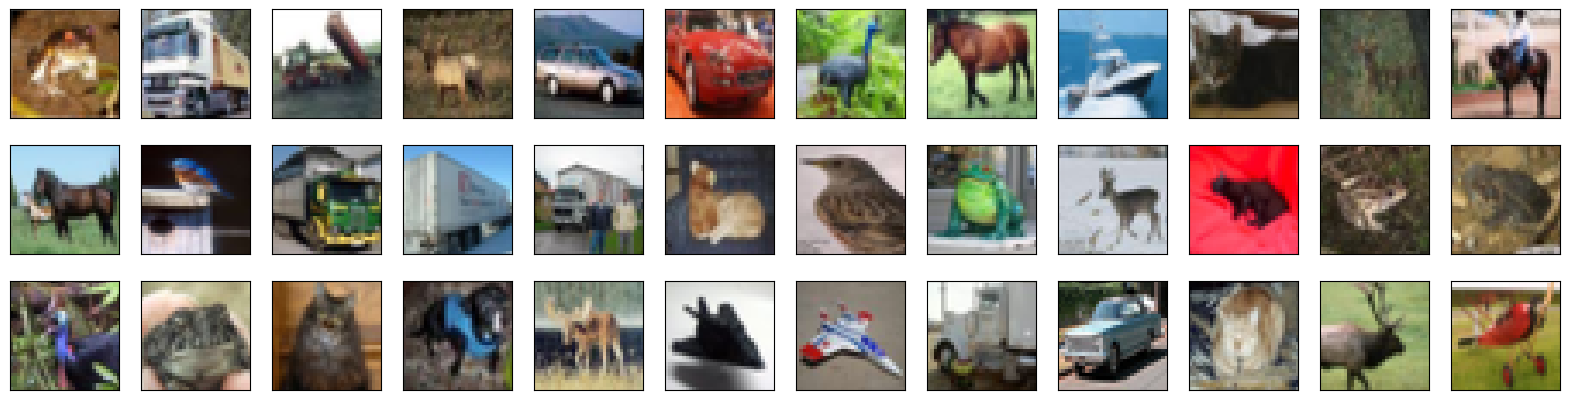

In [5]:
# Visualize the first 36 images
fig = plt.figure(figsize=(20,5)) 
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
plt.show()

In [6]:
# Rescale the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes).astype('float32')
y_test = to_categorical(y_test, num_classes).astype('float32')

# New shape of labels
print(f"Training labels shape: {y_train.shape}, {y_train.dtype}")
print(f"Testing labels shape: {y_test.shape}, {y_test.dtype}")

Training labels shape: (50000, 10), float32
Testing labels shape: (10000, 10), float32


In [7]:
# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the new sets
print(f"Training data shape: {x_train.shape}, {x_train.dtype}")
print(f"Validation data shape: {x_val.shape}, {x_val.dtype}")
print(f"Training labels shape: {y_train.shape}, {y_train.dtype}")
print(f"Validation labels shape: {y_val.shape}, {y_val.dtype}")

Training data shape: (40000, 32, 32, 3), float32
Validation data shape: (10000, 32, 32, 3), float32
Training labels shape: (40000, 10), float32
Validation labels shape: (10000, 10), float32


In [8]:
# Label vectors
# Each row is a one-hot encoded vector
print(f"Training labels (first 5):")
print(y_train[:5])
print("-"*30)
print(f"Validation labels (first 5):")
print(y_val[:5])

Training labels (first 5):
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
------------------------------
Validation labels (first 5):
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


### CNN model

- Conv layer 1: 16 filters, 2x2 kernel, padding=same, ReLU activation
- Max pooling layer 1: 2x2 kernel, stride=2
- Conv layer 2: 32 filters, 2x2 kernel, padding=same, ReLU activation
- Max pooling layer 2: 2x2 kernel, stride=2
- Conv layer 3: 64 filters, 2x2 kernel, padding=same, ReLU activation
- Max pooling layer 3: 2x2 kernel, stride=2
- Dropout layer: 0.3
- Flatten layer
- Dense layer 1: 500 units, ReLU activation
- Dropout layer: 0.4
- Dense layer 2: 10 units, softmax activation

In [9]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [10]:
model = Sequential(name="cifar10_cnn")

# Input layer
model.add(Input(shape=(32, 32, 3)))

# First convolutional layer
model.add(Conv2D(16, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), strides=2))

# Second convolutional layer
model.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), strides=2))

# Third convolutional layer
model.add(Conv2D(64, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), strides=2))

# Flatten layer
model.add(Dropout(0.3))
model.add(Flatten())

# Dense layer 1
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))

# Dense layer 2
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "cifar10_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       512,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 528,054 (2.01 MB)

 Trainable params: 528,054 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

### Compile and train the model

In [12]:
from keras.callbacks import ModelCheckpoint

In [13]:
# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
checkpointer = ModelCheckpoint(filepath='model.weights.best.keras', verbose=1, save_best_only=True)

In [15]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32,
                    validation_data=(x_val, y_val), callbacks=[checkpointer],
                    verbose=2, shuffle=True)

Epoch 1/100

Epoch 1: val_loss improved from inf to 1.38381, saving model to model.weights.best.keras
1250/1250 - 10s - 8ms/step - accuracy: 0.4048 - loss: 1.6419 - val_accuracy: 0.4931 - val_loss: 1.3838
Epoch 2/100

Epoch 2: val_loss improved from 1.38381 to 1.12474, saving model to model.weights.best.keras
1250/1250 - 11s - 9ms/step - accuracy: 0.5322 - loss: 1.3060 - val_accuracy: 0.6024 - val_loss: 1.1247
Epoch 3/100

Epoch 3: val_loss improved from 1.12474 to 1.04200, saving model to model.weights.best.keras
1250/1250 - 11s - 9ms/step - accuracy: 0.5839 - loss: 1.1731 - val_accuracy: 0.6369 - val_loss: 1.0420
Epoch 4/100

Epoch 4: val_loss improved from 1.04200 to 1.01677, saving model to model.weights.best.keras
1250/1250 - 8s - 7ms/step - accuracy: 0.6170 - loss: 1.0925 - val_accuracy: 0.6404 - val_loss: 1.0168
Epoch 5/100

Epoch 5: val_loss improved from 1.01677 to 0.94631, saving model to model.weights.best.keras
1250/1250 - 8s - 7ms/step - accuracy: 0.6357 - loss: 1.0297 - v

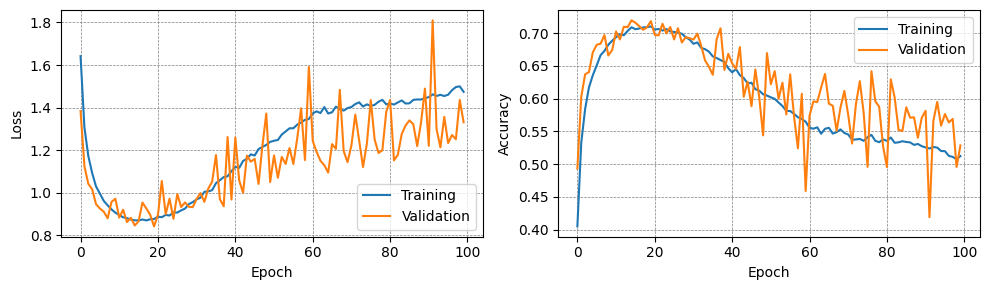

In [26]:
# Plot the training and validation loss
# Plot the training and validation accuracy
# Subplots horizontal

fig, axs = plt.subplots(1, 2, figsize=(10, 3))
axs[0].plot(history.history['loss'], label='Training')
axs[0].plot(history.history['val_loss'], label='Validation')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(color='gray', linestyle='--', linewidth=0.5)
axs[1].plot(history.history['accuracy'], label='Training')
axs[1].plot(history.history['val_accuracy'], label='Validation')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
axs[1].grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### Evaluate the model

Use the test set to evaluate the model. Before that, we need to load the best weights.

In [27]:
model.load_weights('model.weights.best.keras')

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

Test loss: 0.8589
Test accuracy: 0.7118


### CNN model with L2 Regularization

- Conv layer 1: 16 filters, 2x2 kernel, padding=same, ReLU activation
- Max pooling layer 1: 2x2 kernel, stride=2
- Conv layer 2: 32 filters, 2x2 kernel, padding=same, ReLU activation
- Max pooling layer 2: 2x2 kernel, stride=2
- Conv layer 3: 64 filters, 2x2 kernel, padding=same, ReLU activation
- Max pooling layer 3: 2x2 kernel, stride=2
- Dropout layer: 0.3
- Flatten layer
- Dense layer 1: 500 units, ReLU activation
- Dropout layer: 0.4
- Dense layer 2: 10 units, softmax activation

Regularization:

$L2(w) = \lambda \sum_{i=1}^{n} w_i^2$, where $\lambda=1e-4$ is the regularization parameter.


In [28]:
model_l2 = Sequential(name="cifar10_cnn_l2")

# Input layer
model_l2.add(Input(shape=(32, 32, 3)))

# First convolutional layer
model_l2.add(Conv2D(16, (2, 2), padding='same', activation='relu'))
model_l2.add(MaxPooling2D((2, 2), strides=2))

# Second convolutional layer
model_l2.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model_l2.add(MaxPooling2D((2, 2), strides=2))

# Third convolutional layer
model_l2.add(Conv2D(64, (2, 2), padding='same', activation='relu'))
model_l2.add(MaxPooling2D((2, 2), strides=2))

# Flatten layer
model_l2.add(Dropout(0.3))
model_l2.add(Flatten())

# Dense layer 1
model_l2.add(Dense(500, activation='relu'))
model_l2.add(Dropout(0.4))

# Dense layer 2
model_l2.add(Dense(10, activation='softmax'))

In [29]:
model_l2.summary()

Model: "cifar10_cnn_l2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 16)     │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       512,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 528,054 (2.01 MB)

 Trainable params: 528,054 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

### Compile and train the model

In [31]:
opt = keras.optimizers.RMSprop(learning_rate=0.001, weight_decay=1e-4)
model_l2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='model_l2.weights.best.keras', verbose=1, save_best_only=True)
history_l2 = model_l2.fit(x_train, y_train, epochs=100, batch_size=32,
                    validation_data=(x_val, y_val), callbacks=[checkpointer],
                    verbose=2, shuffle=True)


Epoch 1/100

Epoch 1: val_loss improved from inf to 1.34060, saving model to model_l2.weights.best.keras
1250/1250 - 9s - 7ms/step - accuracy: 0.4034 - loss: 1.6446 - val_accuracy: 0.5141 - val_loss: 1.3406
Epoch 2/100

Epoch 2: val_loss improved from 1.34060 to 1.15735, saving model to model_l2.weights.best.keras
1250/1250 - 9s - 7ms/step - accuracy: 0.5294 - loss: 1.3196 - val_accuracy: 0.5905 - val_loss: 1.1574
Epoch 3/100

Epoch 3: val_loss improved from 1.15735 to 1.06095, saving model to model_l2.weights.best.keras
1250/1250 - 9s - 7ms/step - accuracy: 0.5821 - loss: 1.1811 - val_accuracy: 0.6276 - val_loss: 1.0610
Epoch 4/100

Epoch 4: val_loss improved from 1.06095 to 1.03019, saving model to model_l2.weights.best.keras
1250/1250 - 9s - 7ms/step - accuracy: 0.6128 - loss: 1.0994 - val_accuracy: 0.6415 - val_loss: 1.0302
Epoch 5/100

Epoch 5: val_loss improved from 1.03019 to 0.94902, saving model to model_l2.weights.best.keras
1250/1250 - 9s - 7ms/step - accuracy: 0.6350 - loss

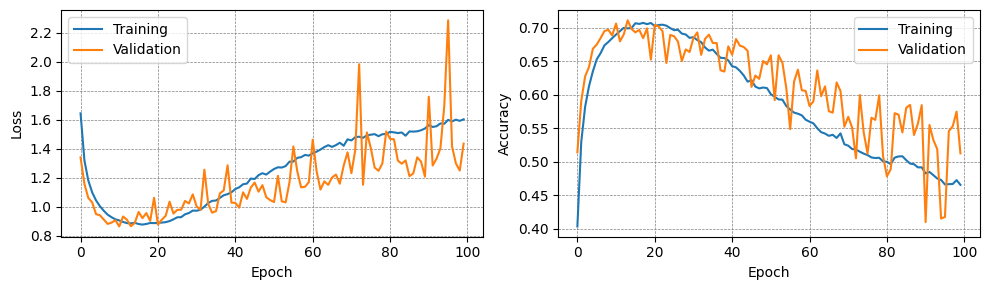

In [32]:
# Plot the training and validation loss
# Plot the training and validation accuracy
# Subplots horizontal

fig, axs = plt.subplots(1, 2, figsize=(10, 3))
axs[0].plot(history_l2.history['loss'], label='Training')
axs[0].plot(history_l2.history['val_loss'], label='Validation')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(color='gray', linestyle='--', linewidth=0.5)
axs[1].plot(history_l2.history['accuracy'], label='Training')
axs[1].plot(history_l2.history['val_accuracy'], label='Validation')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
axs[1].grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### Evaluate the model

Use the test set to evaluate the model. Before that, we need to load the best weights.

In [33]:
model_l2.load_weights('model_l2.weights.best.keras')

# Evaluate the model
test_loss, test_acc = model_l2.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

Test loss: 0.8865
Test accuracy: 0.7031


### CNN model with L2 Regularization and Data Augmentation

- Conv layer 1: 16 filters, 2x2 kernel, padding=same, ReLU activation
- Max pooling layer 1: 2x2 kernel, stride=2
- Conv layer 2: 32 filters, 2x2 kernel, padding=same, ReLU activation
- Max pooling layer 2: 2x2 kernel, stride=2
- Conv layer 3: 64 filters, 2x2 kernel, padding=same, ReLU activation
- Max pooling layer 3: 2x2 kernel, stride=2
- Dropout layer: 0.3
- Flatten layer
- Dense layer 1: 500 units, ReLU activation
- Dropout layer: 0.4
- Dense layer 2: 10 units, softmax activation

Regularization:

$L2(w) = \lambda \sum_{i=1}^{n} w_i^2$, where $\lambda=1e-4$ is the regularization parameter.

Data augmentation:
- Random horizontal flip
- Random rotation (max 15 degrees)
- Random zoom (max 10%)
- Random translation (max 10% of the image size)


### Reload the data

In [44]:
%%capture
(x_train_da, y_train_da), (x_test_da, y_test_da) = cifar10.load_data()

In [45]:
# Split the data into training and validation sets
x_train_da, x_val_da, y_train_da, y_val_da = train_test_split(x_train_da, y_train_da, test_size=0.2, random_state=42)

# One-hot encode the labels
num_classes = len(np.unique(y_train_da))
y_train_da = to_categorical(y_train_da, num_classes).astype('float32')
y_val_da = to_categorical(y_val_da, num_classes).astype('float32')
y_test_da = to_categorical(y_test_da, num_classes).astype('float32')

In [38]:
from keras import layers

In [39]:
# Create the data augmentation layer
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.15),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1, 0.1),
], name="data_augmentation")

# Create the model with data augmentation
model_da = keras.Sequential([
    # Input layer
    layers.Input(shape=(32, 32, 3)),
    
    # Data augmentation
    data_augmentation,
    
    # Normalization
    layers.Rescaling(1./255),
    
    # Convolutional layers
    layers.Conv2D(16, (2, 2), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    
    layers.Conv2D(32, (2, 2), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    
    layers.Conv2D(64, (2, 2), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    
    # Capas densas
    layers.Dropout(0.3),
    layers.Flatten(),
    
    layers.Dense(500, activation='relu'),
    layers.Dropout(0.4),
    
    layers.Dense(10, activation='softmax')
])

In [40]:
model_da.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 16)     │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 64)       │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 500)            │       512,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 528,054 (2.01 MB)

 Trainable params: 528,054 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

### Compile and train the model

In [46]:
opt = keras.optimizers.RMSprop(learning_rate=0.001, weight_decay=1e-4)
model_da.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='model_da.weights.best.keras', verbose=1, save_best_only=True)
history_da = model_da.fit(x_train_da, y_train_da, epochs=100, batch_size=32,
                    validation_data=(x_val_da, y_val_da), callbacks=[checkpointer],
                    verbose=2, shuffle=True)

Epoch 1/100

Epoch 1: val_loss improved from inf to 1.70054, saving model to model_da.weights.best.keras
1250/1250 - 16s - 13ms/step - accuracy: 0.3400 - loss: 1.8190 - val_accuracy: 0.4005 - val_loss: 1.7005
Epoch 2/100

Epoch 2: val_loss improved from 1.70054 to 1.55364, saving model to model_da.weights.best.keras
1250/1250 - 15s - 12ms/step - accuracy: 0.4185 - loss: 1.6043 - val_accuracy: 0.4496 - val_loss: 1.5536
Epoch 3/100

Epoch 3: val_loss improved from 1.55364 to 1.42658, saving model to model_da.weights.best.keras
1250/1250 - 15s - 12ms/step - accuracy: 0.4484 - loss: 1.5320 - val_accuracy: 0.4930 - val_loss: 1.4266
Epoch 4/100

Epoch 4: val_loss did not improve from 1.42658
1250/1250 - 15s - 12ms/step - accuracy: 0.4634 - loss: 1.4910 - val_accuracy: 0.4535 - val_loss: 1.5856
Epoch 5/100

Epoch 5: val_loss did not improve from 1.42658
1250/1250 - 15s - 12ms/step - accuracy: 0.4757 - loss: 1.4657 - val_accuracy: 0.4656 - val_loss: 1.5855
Epoch 6/100

Epoch 6: val_loss improv

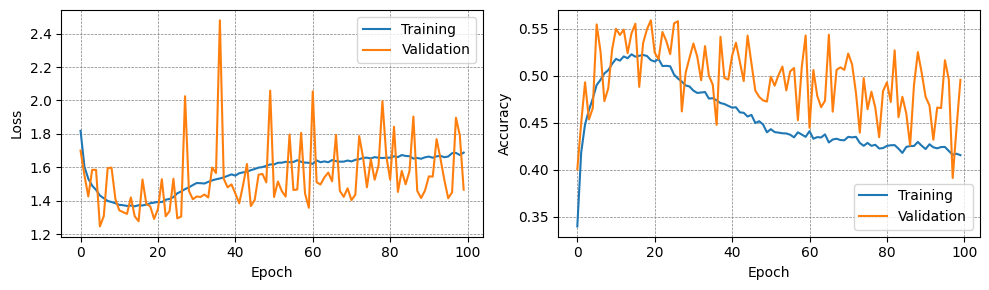

In [47]:
# Plot the training and validation loss
# Plot the training and validation accuracy
# Subplots horizontal

fig, axs = plt.subplots(1, 2, figsize=(10, 3))
axs[0].plot(history_da.history['loss'], label='Training')
axs[0].plot(history_da.history['val_loss'], label='Validation')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(color='gray', linestyle='--', linewidth=0.5)
axs[1].plot(history_da.history['accuracy'], label='Training')
axs[1].plot(history_da.history['val_accuracy'], label='Validation')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
axs[1].grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### Evaluate the model

Use the test set to evaluate the model. Before that, we need to load the best weights.

In [48]:
model_da.load_weights('model_da.weights.best.keras')

# Evaluate the model
test_loss, test_acc = model_da.evaluate(x_test_da, y_test_da, verbose=0)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

Test loss: 1.2535
Test accuracy: 0.5524
